In [1]:
#Name - Mahera Furniturewala
#Reg No - 20BDS0023
#Theory DA-I
#Slot - C1 + TC1

In [3]:
#importing the dataset
import pandas as pd

df = pd.read_csv("ODI.csv", low_memory=False)
df.head()

,Unnamed: 0,Unnamed: 0.1,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,HostCountry
0,0,0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971",Australia
1,1,1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972",United Kingdom
2,2,2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972",India
3,3,3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972",United Kingdom
4,4,4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973",New Zealand


In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Scorecard', 'Team 1', 'Team 2', 'Winner',
       'Margin', 'Ground', 'Match Date', 'HostCountry'],
      dtype='object')

In [5]:
#removing the null values:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
Scorecard         0
Team 1            0
Team 2            0
Winner            0
Margin          186
Ground            0
Match Date        0
HostCountry       0
dtype: int64

In [6]:
df = df[~df.Margin.isnull()]

In [7]:
df.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Scorecard       0
Team 1          0
Team 2          0
Winner          0
Margin          0
Ground          0
Match Date      0
HostCountry     0
dtype: int64

In [8]:
df.shape #to know number of rowws and columns in dataset

(3938, 10)

In [9]:
#splitting Match Date to date and year
df[['Day','Year']] = df['Match Date'].str.split(', ',expand=True)
df['Year'] = df['Year'].astype(int)

In [10]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Scorecard', 'Team 1', 'Team 2', 'Winner',
       'Margin', 'Ground', 'Match Date', 'HostCountry', 'Day', 'Year'],
      dtype='object')

In [11]:
df = df.drop('Match Date', axis="columns")

In [12]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Scorecard', 'Team 1', 'Team 2', 'Winner',
       'Margin', 'Ground', 'HostCountry', 'Day', 'Year'],
      dtype='object')

In [13]:
#Taking input from the user:
country = input("Enter a country")
print(country)

Enter a countryAustralia
Australia


In [14]:
#importing libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
a=df.loc[(df['Team 1']==country)|(df['Team 2']==country)]

<AxesSubplot:xlabel='Year', ylabel='Count'>

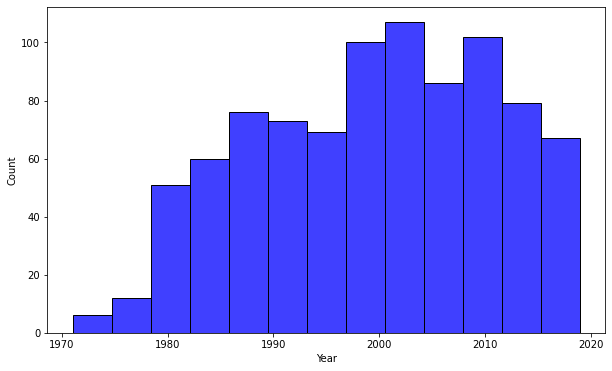

In [16]:
#1. Display the histogram that represents year-wise number of matches played by an input country given. (Australia)
plt.figure(figsize=(10,6))
sns.histplot(a['Year'], color="blue")

In [17]:
#2. Filter out the dataset based on the year given. (Ex: 2018) 
df = df[df['Year']==2018]
print(df)

      Unnamed: 0  Unnamed: 0.1   Scorecard       Team 1        Team 2  \
3945        3945          3945  ODI # 3946  New Zealand      Pakistan   
3946        3946          3946  ODI # 3947  New Zealand      Pakistan   
3947        3947          3947  ODI # 3948       U.A.E.       Ireland   
3948        3948          3948  ODI # 3949  New Zealand      Pakistan   
3949        3949          3949  ODI # 3950       U.A.E.       Ireland   
...          ...           ...         ...          ...           ...   
4067        4067          4067  ODI # 4068  New Zealand      Pakistan   
4068        4068          4068  ODI # 4069    Australia  South Africa   
4070        4070          4070  ODI # 4071   Bangladesh   West Indies   
4071        4071          4071  ODI # 4072   Bangladesh   West Indies   
4072        4072          4072  ODI # 4073   Bangladesh   West Indies   

            Winner     Margin      Ground           HostCountry     Day  Year  
3945   New Zealand    61 runs  Wellington  

In [18]:
print(df.Year.unique()) #the data has been filtered for the year 2018

[2018]


In [19]:
# 3. Which country played most ODIs in 2018.
df[['Team 1','Team 2']].max()

Team 1    Zimbabwe
Team 2    Zimbabwe
dtype: object

In [20]:
# 4. Top three countries who won the most ODIs.
top_three_countries = df['Winner'].value_counts().head(3)
top_three_countries

England       17
India         14
Bangladesh    13
Name: Winner, dtype: int64

<AxesSubplot:>

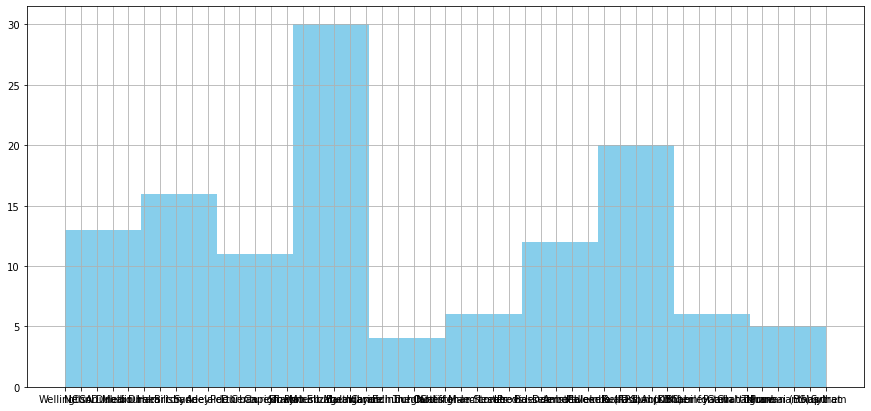

In [21]:
# 5. Based on the ground, map the ODIs
grounds = df['Ground']
grounds
matches_per_ground = grounds.value_counts()
matches_per_ground
plt.figure(figsize = (15,7))
grounds.hist(color="skyblue")

In [22]:
# 6. Which country played most matches in their home ground. 
dict={}
host_name = df['HostCountry']
for i in host_name:
    if i  not in dict.keys():
        dict[i]=1
    else:
        dict[i] = dict[i] + 1
print("The country which played the most matches in their homeground is:")
l = max(zip(dict.values(),dict.keys()))[1]
print(l)

The country which played the most matches in their homeground is:
Zimbabwe


In [23]:
#7. How was the performance of India

dff = df.loc[df["Winner"] == "India"]
display(dff)
index = dff.index
print("\n\ Number of matches won by India in 2018  are: ")
print(len(index))

,Unnamed: 0,Unnamed: 0.1,Scorecard,Team 1,Team 2,Winner,Margin,Ground,HostCountry,Day,Year
3968,3968,3968,ODI # 3969,South Africa,India,India,6 wickets,Durban,RSA,Feb 1,2018
3969,3969,3969,ODI # 3970,South Africa,India,India,9 wickets,Centurion,RSA,Feb 4,2018
3970,3970,3970,ODI # 3971,South Africa,India,India,124 runs,Cape Town,RSA,Feb 7,2018
3975,3975,3975,ODI # 3976,South Africa,India,India,73 runs,Port Elizabeth,RSA,Feb 13,2018
3977,3977,3977,ODI # 3978,South Africa,India,India,8 wickets,Centurion,RSA,Feb 16,2018
4013,4013,4013,ODI # 4014,England,India,India,8 wickets,Nottingham,United Kingdom,Jul 12,2018
4038,4038,4038,ODI # 4039,Hong Kong,India,India,26 runs,Dubai (DSC),United Arab Emirates,Sep 18,2018
4039,4039,4039,ODI # 4040,India,Pakistan,India,8 wickets,Dubai (DSC),United Arab Emirates,Sep 19,2018
4041,4041,4041,ODI # 4042,Bangladesh,India,India,7 wickets,Dubai (DSC),United Arab Emirates,Sep 21,2018
4043,4043,4043,ODI # 4044,India,Pakistan,India,9 wickets,Dubai (DSC),United Arab Emirates,Sep 23,2018



\ Number of matches won by India in 2018  are: 
14


In [24]:
#8. What are the top three countries who won by runs?

res = df["Margin"].str.split(" ", n = 1, expand = True)
df["Won By"] = res[1]
df[df['Won By']=="runs"]['Winner'].value_counts().head(3)

England        8
Bangladesh     8
West Indies    5
Name: Winner, dtype: int64

In [25]:
#9. Month in which most ODIs were played

# new data frame with split value columns
new = df["Day"].str.split(" ", n = 1, expand = True)
  
# making separate month column from new data frame
df["Month"]= new[0]
  
# making date column from new data frame
df["Date"]= new[1]

top_three_months = df['Month'].value_counts().head(3)
top_three_months

Mar    25
Jan    23
Sep    13
Name: Month, dtype: int64

<AxesSubplot:xlabel='Months', ylabel='No of Matches'>

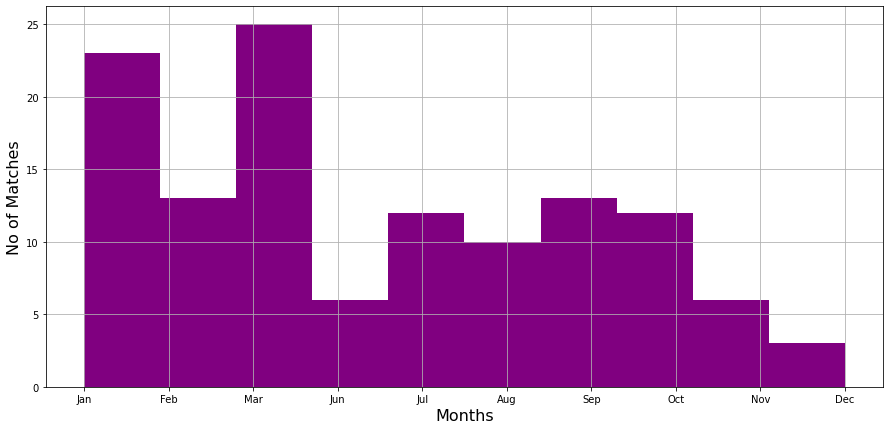

In [26]:
#10. Draw histogram that represents the number of matches played in each month of 2018.
months = df['Month']
months
matches_per_month = months.value_counts()
matches_per_month
plt.figure(figsize = (15,7))
plt. xlabel('Months', fontsize=16)
plt. ylabel('No of Matches', fontsize=16)
months.hist(color="purple")

In [27]:
#11. Did India win mostly by playing first or second innings?
innings1 = df[(df['Team 1']=='India') & (df['Winner']=='India')].value_counts()
i1 = len(innings1)
innings2 = df[(df['Team 2']=='India') & (df['Winner']=='India')].value_counts()
i2 = len(innings2)
if i1 < i2:
    print('Second Innings')
else:
    print('First Innings')

Second Innings


In [46]:
#12. Team which had lost most of the matches
T1 = df["Team 1"].value_counts()
T2 = df["Team 2"].value_counts()
TT = T1 + T2
T4 = df["Winner"].value_counts()
T5 = TT - T4
T5 = T5.sort_values(ascending=False)
print(T5.iloc[[0]])

Zimbabwe    20.0
dtype: float64


In [36]:
#13. Divide the column ‘Margin’ into two different columns. One is for ‘By Runs’, and the other is for ‘By Wickets’
a=df.filter(['Margin'])
run= a[a['Margin'].astype(str).str.contains('runs')]
run.columns=['By runs']
wicket=a[a['Margin'].astype(str).str.contains('wickets')]
wicket.columns=['By Wickets']
print(run)
print(wicket)
print(df)

       By runs
3945   61 runs
3948  183 runs
3949   67 runs
3954   12 runs
3955   24 runs
...        ...
4061   43 runs
4062  224 runs
4065   47 runs
4066    7 runs
4068   40 runs

[63 rows x 1 columns]
      By Wickets
3946   8 wickets
3947   4 wickets
3950   5 wickets
3951   8 wickets
3952   5 wickets
3953   6 wickets
3957   4 wickets
3961   5 wickets
3962   4 wickets
3964  10 wickets
3965   3 wickets
3968   6 wickets
3969   9 wickets
3972   5 wickets
3974   6 wickets
3976  10 wickets
3977   8 wickets
3979   3 wickets
3980   6 wickets
3982   7 wickets
3984   4 wickets
3985   4 wickets
3988   5 wickets
3990   6 wickets
3991   7 wickets
3996   3 wickets
4001   4 wickets
4002   5 wickets
4005   5 wickets
4006   7 wickets
4008   3 wickets
4011   6 wickets
4013   8 wickets
4016   9 wickets
4017   8 wickets
4018   9 wickets
4024   5 wickets
4026   4 wickets
4032   3 wickets
4034   8 wickets
4036   8 wickets
4039   8 wickets
4041   7 wickets
4042   3 wickets
4043   9 wickets
4047   3 wicket

In [37]:
#14. How many matches are ended up with “no result” in each month.
df[df['Winner'].str.contains("no result")] 


,Unnamed: 0,Unnamed: 0.1,Scorecard,Team 1,Team 2,Winner,Margin,Ground,HostCountry,Day,Year,Won By,Month,Date
